# --------------------------------Sentiment Analysis--------------------------------

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

my_user=""
my_pass=getpass.getpass()

 ········


In [2]:
driver = webdriver.Chrome()
driver.get("https://twitter.com/i/flow/login")

In [4]:
user_id = driver.find_element(By.XPATH,'/html/body/div/div/div/div[1]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div/div/div/div[4]/label/div/div[2]/div/input')
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [5]:
password = driver.find_element(By.XPATH,'//*[@id="layers"]/div/div/div/div/div/div/div[2]/div[2]/div/div/div[2]/div[2]/div[1]/div/div/div[3]/div/label/div/div[2]/div[1]/input')
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [6]:
search_item="sushant a class act"

In [7]:
search_box = driver.find_element(By.XPATH,'/html/body/div[1]/div/div/div[2]/main/div/div/div/div[2]/div/div[2]/div/div/div/div[1]/div/div/div/form/div[1]/div/div/div/div/div[2]/div/input')
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [9]:
all_tweets= set()
tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")

while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [10]:
all_tweets = list(all_tweets)
print(all_tweets)

['Sushant has always been a humble and down to earth human being who had no malice in his heart.\n\nHis act of kindness touched millions of hearts.\n\nSushant A Class Act', 'The way sushant was living his life,I am fond of his way \n      Sushant A Class Act', 'I love you for all that you are, all that you have been and all that you will be.\n\nइकरार में शब्दों की एहमियत नहीं होती,\nदिल के जज़्बात की आवाज़ नहीं होती,\nआँखें बयान कर देती है दिल की दास्तान,\nमोहब्बत लफ्जों की मोहताज नहीं होती।\n\nSushant A Class Act', 'Sushant A Class Act', 'We must have mega trend for dil bechara second anniversary on 24 July?\nSushant A Class Act\nCBI Jawaab Do InSSRCase', 'I believe in style.\nnot fashion\n\n\n\n\nSushant A Class Act', 'Byomkesh Bakshi wat a gripping movie.\n\nSushant Singh Rajput class act. Salbeingman has not done this kinda acting in his entire career.', 'You know why this loser thought of him as a problem? Cos Sushant would reject his ghatiya films! He was a class act that didn’t 

# Cleaning Of The Tweets

In [11]:
import pandas as pd
import re
pd.options.display.max_colwidth=1000

In [12]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head(11)

,tweets
0,Sushant has always been a humble and down to earth human being who had no malice in his heart.\n\nHis act of kindness touched millions of hearts.\n\nSushant A Class Act
1,"The way sushant was living his life,I am fond of his way \n Sushant A Class Act"
2,"I love you for all that you are, all that you have been and all that you will be.\n\nइकरार में शब्दों की एहमियत नहीं होती,\nदिल के जज़्बात की आवाज़ नहीं होती,\nआँखें बयान कर देती है दिल की दास्तान,\nमोहब्बत लफ्जों की मोहताज नहीं होती।\n\nSushant A Class Act"
3,Sushant A Class Act
4,We must have mega trend for dil bechara second anniversary on 24 July?\nSushant A Class Act\nCBI Jawaab Do InSSRCase
5,I believe in style.\nnot fashion\n\n\n\n\nSushant A Class Act
6,Byomkesh Bakshi wat a gripping movie.\n\nSushant Singh Rajput class act. Salbeingman has not done this kinda acting in his entire career.
7,You know why this loser thought of him as a problem? Cos Sushant would reject his ghatiya films! He was a class act that didn’t fit in with the guttersnipes & depraved animals in BW.\n\n#JusticeForSushantSinghRajput
8,"Bollywood Fears SushantPower\n""Never think there is ANYTHING IMPOSSIBLE 4 d SOUL. It is d GREATEST heresy 2think so. If there is SIN, this is d only SIN; 2say that U r WEAK,or others r WEAK.""- SWAMI VIVEKANANDA"
9,"Sushant A Class Act:SSR was designing his own game (FAU--G) using Artificial Intelligence & A Unique Printer,rumour was it was not by SSR then why the LOGO on SSR tea-shirt?as we knew SSR tea-shirts spoke volumes;\n@HMOIndia\n,\n@KirenRijiju\n,\n@Dev_Fadnavis\n,\n@himantabiswa\n,\n@withoutthemind"


In [13]:
one_tweet = df.iloc[10]['tweets']
print(one_tweet)

@pranjalwagh
 but he is a class act !!! Volley baap hoti


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
def TweetCleaning(tweet):
    cleanTweet=re.sub(r"@[a-zA-Z0-1]+","",tweet)
    cleanTweet=re.sub(r"#[a-zA-Z0-1]+","",cleanTweet)
    cleanTweet=re.sub(r"[+]+","",cleanTweet)
    cleanTweet=' '.join(word for word in cleanTweet.split() if word not in stop_words)
    return cleanTweet

In [17]:
df['cleanedTweets']=df['tweets'].apply(TweetCleaning)
df.head()

,tweets,cleanedTweets
0,Sushant has always been a humble and down to earth human being who had no malice in his heart.\n\nHis act of kindness touched millions of hearts.\n\nSushant A Class Act,Sushant always humble earth human malice heart. His act kindness touched millions hearts. Sushant A Class Act
1,"The way sushant was living his life,I am fond of his way \n Sushant A Class Act","The way sushant living life,I fond way Sushant A Class Act"
2,"I love you for all that you are, all that you have been and all that you will be.\n\nइकरार में शब्दों की एहमियत नहीं होती,\nदिल के जज़्बात की आवाज़ नहीं होती,\nआँखें बयान कर देती है दिल की दास्तान,\nमोहब्बत लफ्जों की मोहताज नहीं होती।\n\nSushant A Class Act","I love are, be. इकरार में शब्दों की एहमियत नहीं होती, दिल के जज़्बात की आवाज़ नहीं होती, आँखें बयान कर देती है दिल की दास्तान, मोहब्बत लफ्जों की मोहताज नहीं होती। Sushant A Class Act"
3,Sushant A Class Act,Sushant A Class Act
4,We must have mega trend for dil bechara second anniversary on 24 July?\nSushant A Class Act\nCBI Jawaab Do InSSRCase,We must mega trend dil bechara second anniversary 24 July? Sushant A Class Act CBI Jawaab Do InSSRCase


In [18]:
from langdetect import detect
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'
df['language'] = df['tweets'].apply(detect_language)
# Filter out non-English rows
df = df[df['language'] == 'en']
# Drop the language column if no longer needed
df = df.drop(columns=['language'])
df.head(11)

,tweets,cleanedTweets
0,Sushant has always been a humble and down to earth human being who had no malice in his heart.\n\nHis act of kindness touched millions of hearts.\n\nSushant A Class Act,Sushant always humble earth human malice heart. His act kindness touched millions hearts. Sushant A Class Act
1,"The way sushant was living his life,I am fond of his way \n Sushant A Class Act","The way sushant living life,I fond way Sushant A Class Act"
3,Sushant A Class Act,Sushant A Class Act
4,We must have mega trend for dil bechara second anniversary on 24 July?\nSushant A Class Act\nCBI Jawaab Do InSSRCase,We must mega trend dil bechara second anniversary 24 July? Sushant A Class Act CBI Jawaab Do InSSRCase
5,I believe in style.\nnot fashion\n\n\n\n\nSushant A Class Act,I believe style. fashion Sushant A Class Act
6,Byomkesh Bakshi wat a gripping movie.\n\nSushant Singh Rajput class act. Salbeingman has not done this kinda acting in his entire career.,Byomkesh Bakshi wat gripping movie. Sushant Singh Rajput class act. Salbeingman done kinda acting entire career.
7,You know why this loser thought of him as a problem? Cos Sushant would reject his ghatiya films! He was a class act that didn’t fit in with the guttersnipes & depraved animals in BW.\n\n#JusticeForSushantSinghRajput,You know loser thought problem? Cos Sushant would reject ghatiya films! He class act didn’t fit guttersnipes & depraved animals BW.
8,"Bollywood Fears SushantPower\n""Never think there is ANYTHING IMPOSSIBLE 4 d SOUL. It is d GREATEST heresy 2think so. If there is SIN, this is d only SIN; 2say that U r WEAK,or others r WEAK.""- SWAMI VIVEKANANDA","Bollywood Fears SushantPower ""Never think ANYTHING IMPOSSIBLE 4 SOUL. It GREATEST heresy 2think so. If SIN, SIN; 2say U r WEAK,or others r WEAK.""- SWAMI VIVEKANANDA"
9,"Sushant A Class Act:SSR was designing his own game (FAU--G) using Artificial Intelligence & A Unique Printer,rumour was it was not by SSR then why the LOGO on SSR tea-shirt?as we knew SSR tea-shirts spoke volumes;\n@HMOIndia\n,\n@KirenRijiju\n,\n@Dev_Fadnavis\n,\n@himantabiswa\n,\n@withoutthemind","Sushant A Class Act:SSR designing game (FAU--G) using Artificial Intelligence & A Unique Printer,rumour SSR LOGO SSR tea-shirt?as knew SSR tea-shirts spoke volumes; , , _Fadnavis , ,"
10,@pranjalwagh\n but he is a class act !!! Volley baap hoti,class act !!! Volley baap hoti


In [19]:
from textblob import TextBlob
from wordcloud import WordCloud

def calculatePolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calculateSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(row):
    polarity = row['tPolarity']
    subjectivity = row['tSubjectivity']

    if polarity < 0 :
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [20]:
df['tPolarity']=df['cleanedTweets'].apply(calculatePolarity)
df['tSubjectivity']=df['cleanedTweets'].apply(calculateSubjectivity)
df['segmentation'] = df.apply(segmentation, axis=1)
df

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,Sushant has always been a humble and down to earth human being who had no malice in his heart.\n\nHis act of kindness touched millions of hearts.\n\nSushant A Class Act,Sushant always humble earth human malice heart. His act kindness touched millions hearts. Sushant A Class Act,-0.100000,0.250000,Negative
1,"The way sushant was living his life,I am fond of his way \n Sushant A Class Act","The way sushant living life,I fond way Sushant A Class Act",0.000000,0.000000,Neutral
3,Sushant A Class Act,Sushant A Class Act,0.000000,0.000000,Neutral
4,We must have mega trend for dil bechara second anniversary on 24 July?\nSushant A Class Act\nCBI Jawaab Do InSSRCase,We must mega trend dil bechara second anniversary 24 July? Sushant A Class Act CBI Jawaab Do InSSRCase,0.000000,0.000000,Neutral
5,I believe in style.\nnot fashion\n\n\n\n\nSushant A Class Act,I believe style. fashion Sushant A Class Act,0.000000,0.000000,Neutral
6,Byomkesh Bakshi wat a gripping movie.\n\nSushant Singh Rajput class act. Salbeingman has not done this kinda acting in his entire career.,Byomkesh Bakshi wat gripping movie. Sushant Singh Rajput class act. Salbeingman done kinda acting entire career.,0.166667,0.541667,Positive
7,You know why this loser thought of him as a problem? Cos Sushant would reject his ghatiya films! He was a class act that didn’t fit in with the guttersnipes & depraved animals in BW.\n\n#JusticeForSushantSinghRajput,You know loser thought problem? Cos Sushant would reject ghatiya films! He class act didn’t fit guttersnipes & depraved animals BW.,0.400000,0.400000,Positive
8,"Bollywood Fears SushantPower\n""Never think there is ANYTHING IMPOSSIBLE 4 d SOUL. It is d GREATEST heresy 2think so. If there is SIN, this is d only SIN; 2say that U r WEAK,or others r WEAK.""- SWAMI VIVEKANANDA","Bollywood Fears SushantPower ""Never think ANYTHING IMPOSSIBLE 4 SOUL. It GREATEST heresy 2think so. If SIN, SIN; 2say U r WEAK,or others r WEAK.""- SWAMI VIVEKANANDA",-0.013889,0.875000,Negative
9,"Sushant A Class Act:SSR was designing his own game (FAU--G) using Artificial Intelligence & A Unique Printer,rumour was it was not by SSR then why the LOGO on SSR tea-shirt?as we knew SSR tea-shirts spoke volumes;\n@HMOIndia\n,\n@KirenRijiju\n,\n@Dev_Fadnavis\n,\n@himantabiswa\n,\n@withoutthemind","Sushant A Class Act:SSR designing game (FAU--G) using Artificial Intelligence & A Unique Printer,rumour SSR LOGO SSR tea-shirt?as knew SSR tea-shirts spoke volumes; , , _Fadnavis , ,",-0.208333,0.800000,Negative
10,@pranjalwagh\n but he is a class act !!! Volley baap hoti,class act !!! Volley baap hoti,0.000000,0.000000,Neutral


# Analysis and Visualization

In [21]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
Negative,8
Neutral,28
Positive,21


In [22]:
#top 3 negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
20,Yeah Ray I saw that earlier. Was quite shocked to learn that Sushant was supposed to have done it but got replaced by that starkid instead. Now imagining what a class act he wud hv delivered makes me even sadder. Btw I have not watched the movie nor read the novel. Not my cuppa.,Yeah Ray I saw earlier. Was quite shocked learn Sushant supposed done got replaced starkid instead. Now imagining class act wud hv delivered makes even sadder. Btw I watched movie read novel. Not cuppa.,-0.350000,0.650000,Negative
16,That turn to beat the defender from half line was class act ... Robben scores n Dutch go ahead despite a poor 20 mins #NED #AUS #WC2014,That turn beat defender half line class act ... Robben scores n Dutch go ahead despite poor 20 mins 2014,-0.283333,0.383333,Negative
9,"Sushant A Class Act:SSR was designing his own game (FAU--G) using Artificial Intelligence & A Unique Printer,rumour was it was not by SSR then why the LOGO on SSR tea-shirt?as we knew SSR tea-shirts spoke volumes;\n@HMOIndia\n,\n@KirenRijiju\n,\n@Dev_Fadnavis\n,\n@himantabiswa\n,\n@withoutthemind","Sushant A Class Act:SSR designing game (FAU--G) using Artificial Intelligence & A Unique Printer,rumour SSR LOGO SSR tea-shirt?as knew SSR tea-shirts spoke volumes; , , _Fadnavis , ,",-0.208333,0.800000,Negative


In [23]:
#top 3 positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
27,"Happy Flag Day,Warriors!\n\n\nJuly 22 marks the adoption if the Indian Tricolour as the National Flag of India!\nLink for details of the same\n\nhttps://jagranjosh.com/general-knowledge/national-flag-day-in-india-2023-1689994248-1…\n\nCBI Jawaab Do InSSRCase","Happy Flag Day,Warriors! July 22 marks adoption Indian Tricolour National Flag India! Link details https://jagranjosh.com/general-knowledge/national-flag-day-in-india-2023-1689994248-1… CBI Jawaab Do InSSRCase",1.00,1.0,Positive
15,Vihari is a class act though. Showed that in Australia too.\nAgarwal Shaw\nPujara Kohli Rahane Vihari\nSaha\nJadeja Shami Sharma Bumrah\n(Barring no injuries this is the best XI),Vihari class act though. Showed Australia too. Agarwal Shaw Pujara Kohli Rahane Vihari Saha Jadeja Shami Sharma Bumrah (Barring injuries best XI),1.00,0.3,Positive
22,Good Morning Beautiful People!\n\nMTL:\nCBI Jawaab Do InSSRCase\n\nETL:\nSushant A Class Act,Good Morning Beautiful People! MTL: CBI Jawaab Do InSSRCase ETL: Sushant A Class Act,0.85,0.8,Positive


In [24]:
# 3 neutral
df[df.tPolarity==0].head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
1,"The way sushant was living his life,I am fond of his way \n Sushant A Class Act","The way sushant living life,I fond way Sushant A Class Act",0.0,0.0,Neutral
3,Sushant A Class Act,Sushant A Class Act,0.0,0.0,Neutral
4,We must have mega trend for dil bechara second anniversary on 24 July?\nSushant A Class Act\nCBI Jawaab Do InSSRCase,We must mega trend dil bechara second anniversary 24 July? Sushant A Class Act CBI Jawaab Do InSSRCase,0.0,0.0,Neutral


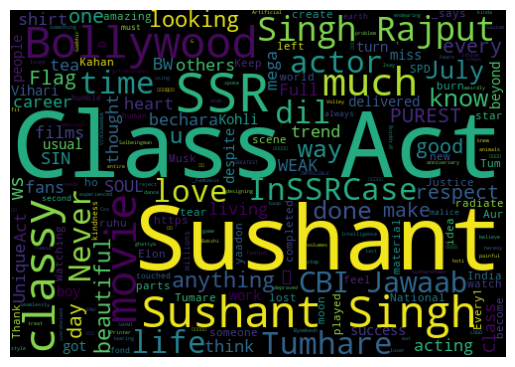

In [25]:
import matplotlib.pyplot as plt
consolidated = ' '.join(word for word in df['cleanedTweets'])
word_cloud = WordCloud(width=500,height=350,random_state=30, max_font_size=140).generate(consolidated)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

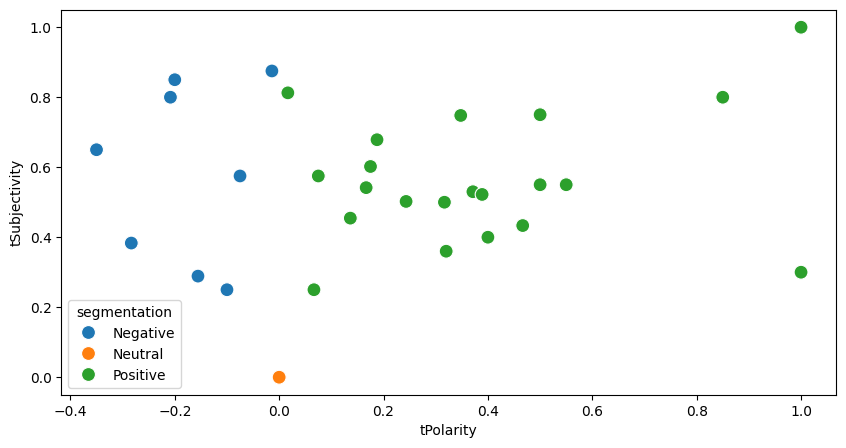

In [26]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(x='tPolarity',y='tSubjectivity',data=df,hue='segmentation',s=100)

<Axes: xlabel='segmentation', ylabel='count'>

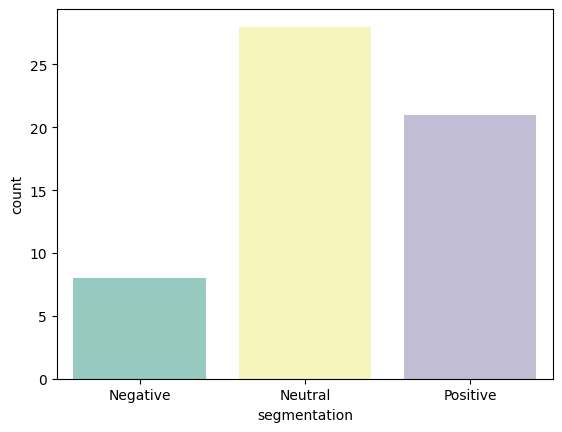

In [27]:
sns.countplot(data=df,x='segmentation',hue='segmentation',palette='Set3')
# OR
# sns.countplot(data=df,x='segmentation',hue='segmentation',palette=['#FF5733','#33FF57','#3357FF'])

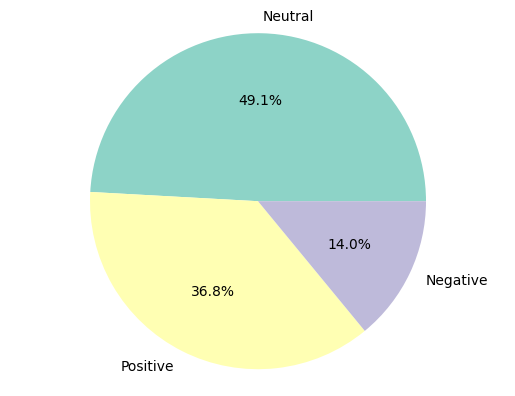

In [28]:
counts=df['segmentation'].value_counts()
# Get the colors from the Set3 palette
colours=sns.color_palette('Set3',n_colors=len(counts))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',colors=colours)
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()